In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [94]:
df= pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [95]:
print(df.shape)

(5043, 28)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

It is clear that there are many null values in our dataset that need to be taken care of
We will be observing categorical features initially

# 1.Color

In [97]:
df["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

<AxesSubplot:xlabel='color', ylabel='count'>

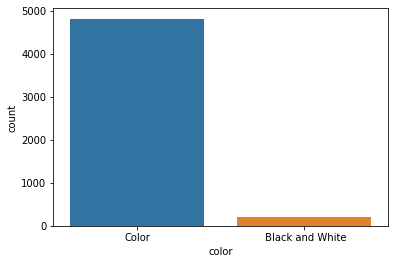

In [98]:
sns.countplot(df["color"])

# 2.Genres

In [99]:
#Top 10 genres
df["genres"].value_counts().head(10)

Drama                          236
Comedy                         209
Comedy|Drama                   191
Comedy|Drama|Romance           187
Comedy|Romance                 158
Drama|Romance                  152
Crime|Drama|Thriller           101
Horror                          71
Action|Crime|Drama|Thriller     68
Action|Crime|Thriller           65
Name: genres, dtype: int64

<AxesSubplot:>

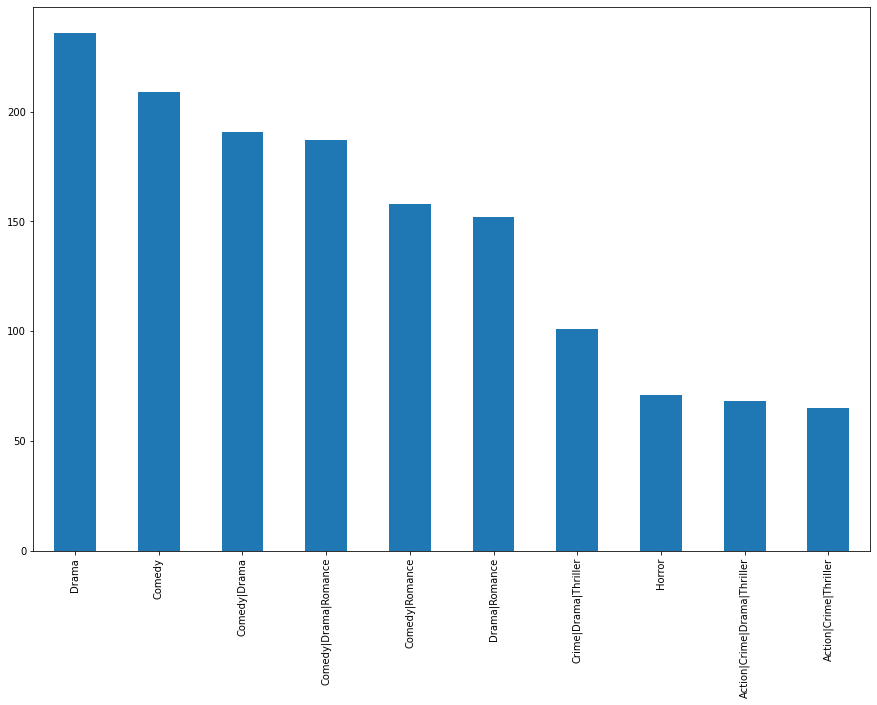

In [100]:
#Plotting population graph of top 10 genres
plt.figure(figsize=(15,10))
df['genres'].value_counts()[0:10].plot.bar()

# 3. Language

In [101]:
df["language"].value_counts()

English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Russian         11
Cantonese       11
Italian         11
Korean           8
Portuguese       8
Danish           5
Hebrew           5
Swedish          5
Arabic           5
Norwegian        4
Polish           4
Persian          4
Dutch            4
Thai             3
Chinese          3
Indonesian       2
Zulu             2
Aboriginal       2
Romanian         2
Icelandic        2
Dari             2
None             2
Aramaic          1
Slovenian        1
Telugu           1
Czech            1
Greek            1
Kannada          1
Urdu             1
Bosnian          1
Vietnamese       1
Filipino         1
Hungarian        1
Tamil            1
Swahili          1
Kazakh           1
Mongolian        1
Dzongkha         1
Maya             1
Panjabi          1
Name: language, dtype: int64

<AxesSubplot:>

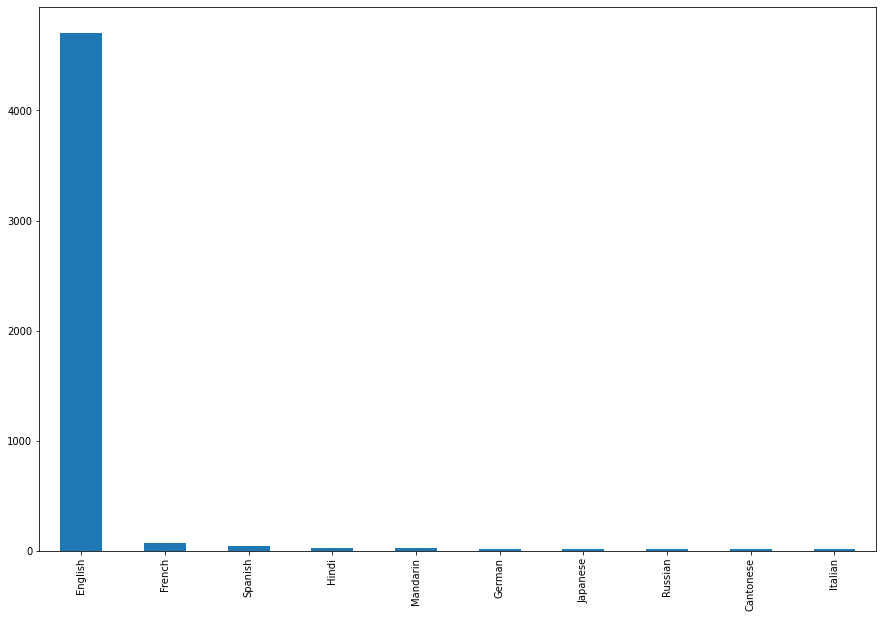

In [102]:
#Plotting population graph of top 10 genres
plt.figure(figsize=(15,10))
df['language'].value_counts()[0:10].plot.bar()

# 4. Country

In [103]:
df["country"].value_counts()

USA         3807
UK           448
France       154
Canada       126
Germany       97
            ... 
Slovakia       1
Cameroon       1
Aruba          1
Georgia        1
Turkey         1
Name: country, Length: 65, dtype: int64

<AxesSubplot:>

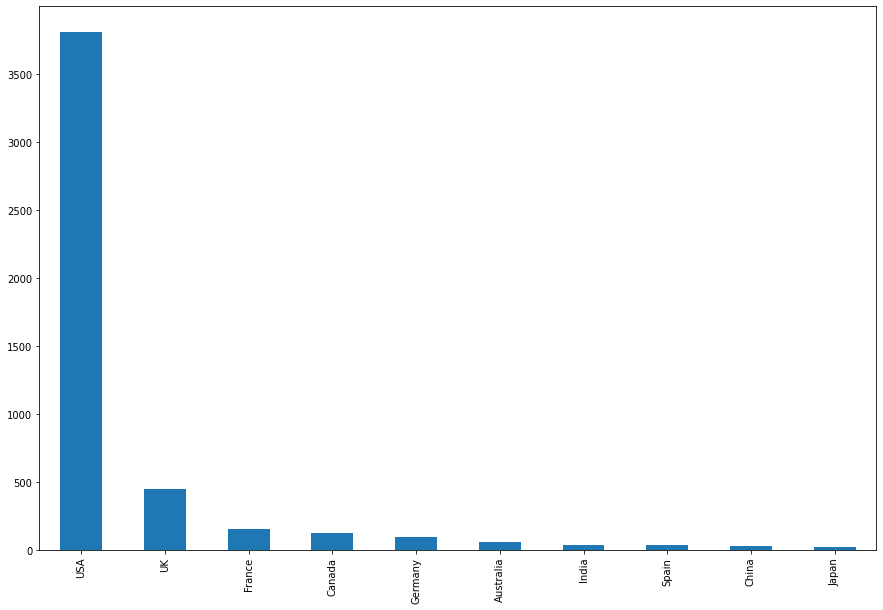

In [104]:
#Plotting population graph of top 10 genres
plt.figure(figsize=(15,10))
df['country'].value_counts()[0:10].plot.bar()

# 4. imdb rating

In [105]:
df["imdb_score"].mean()

6.442137616498116

In [106]:
df["imdb_score"].mode()

0    6.7
dtype: float64

# 5. Movie Names

In [107]:
df["movie_title"].value_counts().head(5)

The Fast and the Furious     3
Victor Frankenstein          3
Halloween                    3
King Kong                    3
Pan                          3
Name: movie_title, dtype: int64

# 6. The year when maximum number of movies are released

In [108]:
#The year that occured most number of times
df["title_year"].value_counts().head(1)

2009.0    260
Name: title_year, dtype: int64

Maximum movies in the dataset were released in the year 2009

In [109]:
#Fill the na values in title year with 0
df["title_year"].fillna(value=0, inplace=True)
df["title_year"]=df["title_year"].apply(np.int64)

<AxesSubplot:>

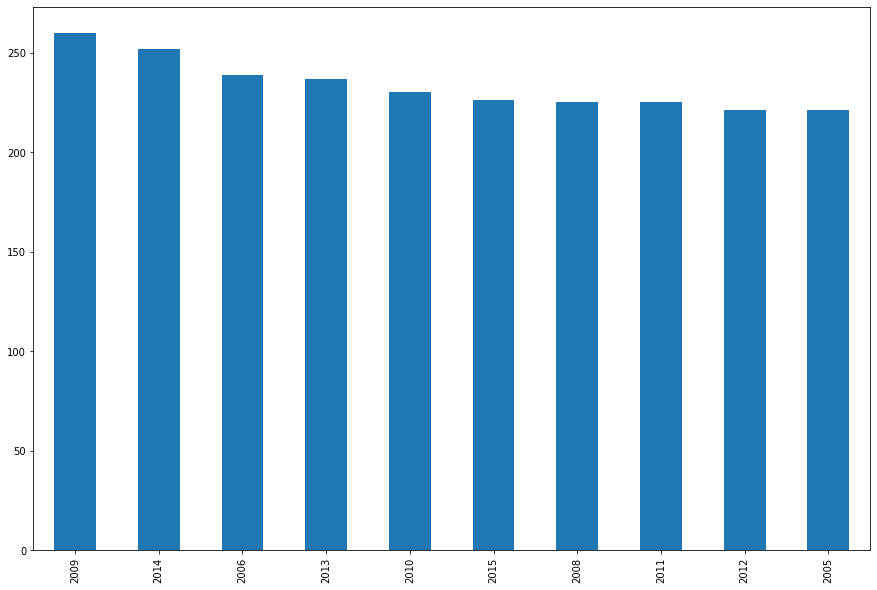

In [110]:
#Plotting population graph of top 10 title years
plt.figure(figsize=(15,10))
df['title_year'].value_counts()[0:10].plot.bar()

# Movie Recommendation System (based on IMDB Rating)

In [111]:
df2=df.sort_values("imdb_score",ascending=False)

In [112]:
# Print the top 20 recommended movies based on this system- simply top 20 rows of df2
print("Top 15 Recommended Movies- based on IMDB rating")
df2[["movie_title", "title_year","genres","language","director_name","imdb_score"]].head(20)

Top 15 Recommended Movies- based on IMDB rating


,movie_title,title_year,genres,language,director_name,imdb_score
2765,Towering Inferno,0,Comedy,English,John Blanchard,9.5
1937,The Shawshank Redemption,1994,Crime|Drama,English,Frank Darabont,9.3
3466,The Godfather,1972,Crime|Drama,English,Francis Ford Coppola,9.2
4409,Kickboxer: Vengeance,2016,Action,NaN,John Stockwell,9.1
2824,Dekalog,0,Drama,Polish,NaN,9.1
3207,Dekalog,0,Drama,Polish,NaN,9.1
66,The Dark Knight,2008,Action|Crime|Drama|Thriller,English,Christopher Nolan,9.0
2837,The Godfather: Part II,1974,Crime|Drama,English,Francis Ford Coppola,9.0
3481,Fargo,0,Crime|Drama|Thriller,English,NaN,9.0
339,The Lord of the Rings: The Return of the King,2003,Action|Adventure|Drama|Fantasy,English,Peter Jackson,8.9


# Content Based Movie Recommendation System


In [123]:
df3= df[['movie_title','title_year','director_name','genres','actor_1_name','actor_2_name','actor_3_name']]
df3.head()

,movie_title,title_year,director_name,genres,actor_1_name,actor_2_name,actor_3_name
0,Avatar,2009,James Cameron,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,2007,Gore Verbinski,Action|Adventure|Fantasy,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,2015,Sam Mendes,Action|Adventure|Thriller,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,2012,Christopher Nolan,Action|Thriller,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,Documentary,Doug Walker,Rob Walker,NaN


Preprocess the data like remove | between genres, correct any discrepancies in names, and filling null values

In [124]:
#Remove | between genres
df3["genres"]=df3["genres"].apply(lambda a:str(a).replace("|"," "))
df3["genres"].head()

0    Action Adventure Fantasy Sci-Fi
1           Action Adventure Fantasy
2          Action Adventure Thriller
3                    Action Thriller
4                        Documentary
Name: genres, dtype: object

In [125]:
df3["movie_title"][10]

'Batman v Superman: Dawn of Justice\xa0'

We need to get rid of the last element in movie title

In [126]:
df3["movie_title"]=df3["movie_title"].apply(lambda a:str(a)[:-1])
df3["movie_title"][10]

'Batman v Superman: Dawn of Justice'

In [127]:
# we can combine director's and actors names ito a single feature this will help us in converting people involved in a movie
#to be erepresented as a single vector. These vectors can be used to find cosine similarity with other movies
df3["director_genre_actors"]=df3["director_name"]+" "+df3["actor_1_name"]+" "+df3["actor_2_name"]+" "+df3["actor_3_name"]+" "+df["genres"]
df3=df3.drop(columns=["director_name","actor_1_name","actor_2_name","actor_3_name","genres"],axis=1)
df3.head()

,movie_title,title_year,director_genre_actors
0,Avatar,2009,James Cameron CCH Pounder Joel David Moore Wes...
1,Pirates of the Caribbean: At World's End,2007,Gore Verbinski Johnny Depp Orlando Bloom Jack ...
2,Spectre,2015,Sam Mendes Christoph Waltz Rory Kinnear Stepha...
3,The Dark Knight Rises,2012,Christopher Nolan Tom Hardy Christian Bale Jos...
4,Star Wars: Episode VII - The Force Awakens ...,0,NaN


In [128]:
#Fill na values for other features which are strings (the only numeric gfeature year has already been filled as 0 wherever null)
df3.fillna(value="",inplace=True)


In [129]:
df3.isnull().sum()

movie_title              0
title_year               0
director_genre_actors    0
dtype: int64

So we can see that we have no null values hence we can proceed

Nowe we will convert our director_actor combined feature into a vector by using Count Vectorizer which converts a text document ito a matrix of token counts. Each row representing each line in the document and each column representing a unique word in the text document. CountVec[row][column]=k then k represents the no. of times word column occured in line no. row (BoW)

We compute the similarity between movies by computing cosine similarity between countVectors of the 2 movies we needto find similarity between

In [130]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vec = CountVectorizer()
vec_matrix = vec.fit_transform(df3['director_genre_actors'])

similarity = cosine_similarity(vec_matrix)

In [149]:
#Before creating the recommendation function, we look at an instance
#Try finding recommendations similar to the movie "Avatar"
movie="Batman v Superman: Dawn of Justice"
#Find the row index for this movie
i=df3.loc[df3["movie_title"]==movie].index[0]
print(i)
# Check the similarity matrix row for this particular index
#Each row consists of the cosine similarty with each other movie available
L=list(enumerate(similarity[i]))
#Sort the similarty row in descending order of similarity
L=sorted(L, key=lambda x:x[1], reverse=True)
#Print the top 10 similar movies excluding the first 
#since first has the highest similarity i.e. 1 and is the vector itself hence we avoid recommending the movie itself
L=L[1:11]
print(L)

10
[(15, 0.6405126152203486), (4690, 0.4803844614152615), (109, 0.4351941398892446), (481, 0.4166666666666668), (165, 0.4003203845127179), (112, 0.38575837490522985), (1343, 0.38575837490522985), (1667, 0.36084391824351614), (44, 0.3481553119113957), (48, 0.3481553119113957)]


In [150]:
name=[]
year=[]
for i in L:
    x=df3.loc[i[0]]
    name.append(x["movie_title"])
    year.append(x["title_year"])
print("Recommended movies are: ")
recommended=pd.DataFrame({"Movie Title":name, "Release Year":year})
print(recommended)

Recommended movies are: 
               Movie Title  Release Year
0             Man of Steel          2013
1                  Destiny          2014
2       Terminator Genisys          2015
3         The Time Machine          2002
4                 Watchmen          2009
5             Transformers          2007
6   Star Trek: Generations          1994
7                        9          2009
8     Terminator Salvation          2009
9  Star Trek Into Darkness          2013


 Create a function for the above which will eturn top ten movies similar to itself

In [158]:
def recommend_movie(movie):
    if movie not in df3['movie_title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i=df3.loc[df3["movie_title"]==movie].index[0]
        L=list(enumerate(similarity[i]))
        L=sorted(L, key=lambda x:x[1], reverse=True)
        L=L[1:11]
        name=[]
        year=[]
        for i in L:
            x=df3.loc[i[0]]
            name.append(x["movie_title"])
            year.append(x["title_year"])
        print("Recommended movies are: ")
        recommended=pd.DataFrame({"Movie Title":name, "Release Year":year}) 
        recommended.drop_duplicates
        plt.figure(figsize=(10,5))
        plt.bar(name, [i[1] for i in L])
        plt.xticks(rotation=90)
        plt.xlabel('Movies similar to → '+movie, fontsize=12,fontweight="bold")
        plt.ylabel('cosine scores', fontsize=12,fontweight="bold")
        plt.show()
        return recommended

Recommended movies are: 


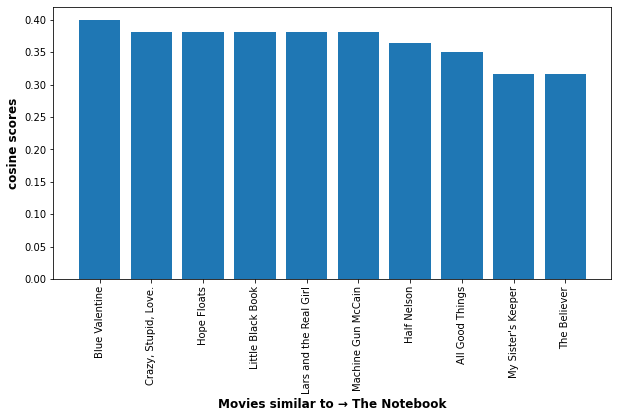

,Movie Title,Release Year
0,Blue Valentine,2010
1,"Crazy, Stupid, Love.",2011
2,Hope Floats,1998
3,Little Black Book,2004
4,Lars and the Real Girl,2007
5,Machine Gun McCain,1969
6,Half Nelson,2006
7,All Good Things,2010
8,My Sister's Keeper,2009
9,The Believer,2001


In [159]:
recommend_movie("The Notebook")

In [160]:
recommend_movie("Kaho Na Pyaar Hai")

'Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies'

Recommended movies are: 


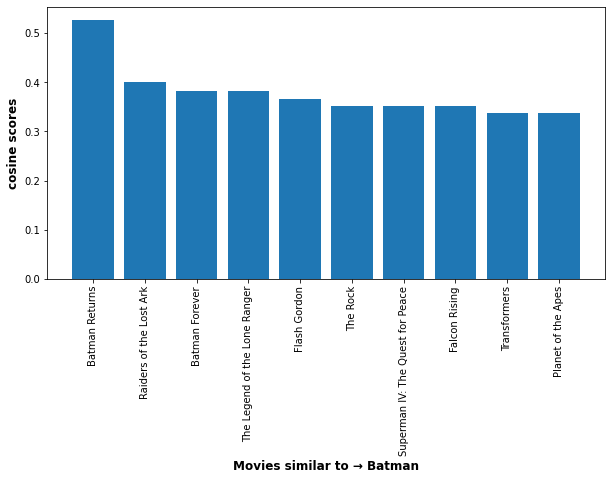

,Movie Title,Release Year
0,Batman Returns,1992
1,Raiders of the Lost Ark,1981
2,Batman Forever,1995
3,The Legend of the Lone Ranger,1981
4,Flash Gordon,1980
5,The Rock,1996
6,Superman IV: The Quest for Peace,1987
7,Falcon Rising,2014
8,Transformers,2007
9,Planet of the Apes,2001


In [161]:
recommend_movie("Batman")

Recommended movies are: 


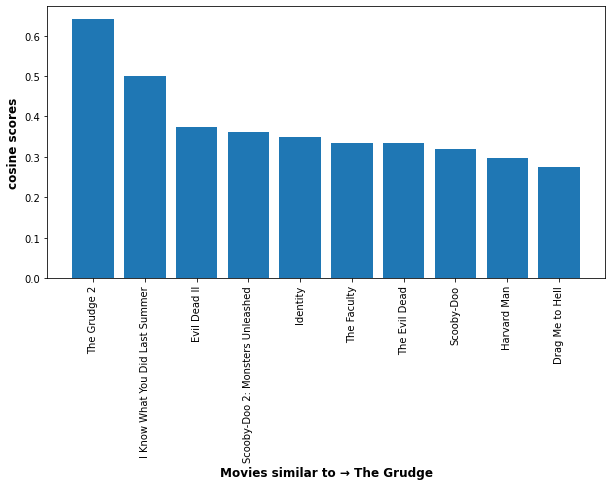

,Movie Title,Release Year
0,The Grudge 2,2006
1,I Know What You Did Last Summer,1997
2,Evil Dead II,1987
3,Scooby-Doo 2: Monsters Unleashed,2004
4,Identity,2003
5,The Faculty,1998
6,The Evil Dead,1981
7,Scooby-Doo,2002
8,Harvard Man,2001
9,Drag Me to Hell,2009


In [163]:
recommend_movie("The Grudge")